# Imports and Mounting our Google Drive

In [ ]:
# Import Cell
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import keras
from google.colab import drive
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
drive.mount('/content/gdrive')
data_dir = r"/content/gdrive/My Drive/Datasets/"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Importing the data and performing preliminary analysis.

In [ ]:
# Read in the Data
df=pd.read_csv(data_dir+"Spam.csv")

In [ ]:
# Check the first 5 rows
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Check to see if data is clean
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
# Print the number of rows and columns
print(len(df))
print(len(df.columns))

4601
58


# Isolating our target class and testing for correlation

In [ ]:
# Isolate our X data
X=df.drop(columns=["spam"])
# Isolate our target variable
y=df["spam"]

<Axes: >

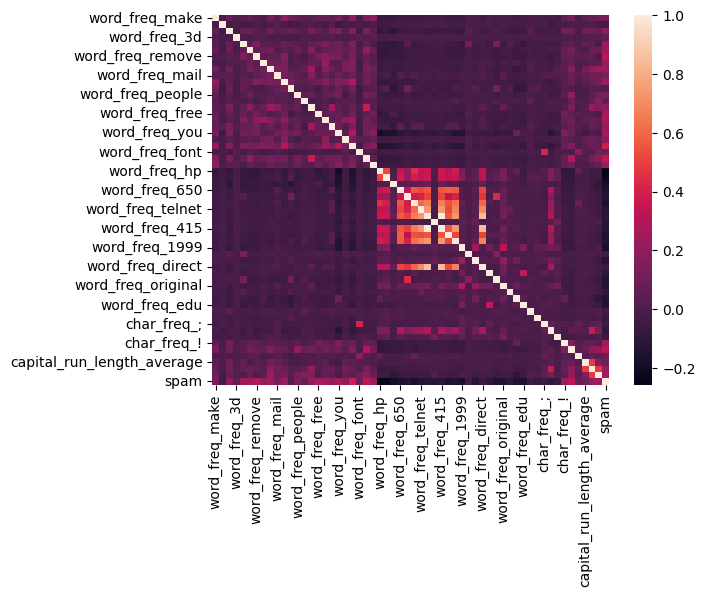

In [ ]:
# Check the correlations between the variables
correlation=df.corr()
# Plot the correlations using a heatmap
sns.heatmap(correlation)

# Moving on to Machine Learning

# Creating our training and testing split.

In [ ]:
# Make da training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Classification with Decision Trees.

In [ ]:
# Define the Classifier and the random state
DTC=DecisionTreeClassifier(random_state=14)

In [ ]:
# Apply the classifier and print the accuracy
scores_dtc=cross_val_score(DTC, X, y, scoring='accuracy')
print("Accuracy: {0:.5f} %".format(np.mean(scores_dtc)*100))

Accuracy: 88.19771 %


# Classification with Random Forests.

In [ ]:
# Define the classifier and the random state
RFC=RandomForestClassifier(random_state=14)

In [ ]:
# Apply the classifier and print the accuracy
scores_rfc=cross_val_score(RFC, X, y, scoring='accuracy')
print("Accuracy: {0:.5f} %".format(np.mean(scores_rfc)*100))

Accuracy: 92.76205 %


# Visualizing Decision Trees

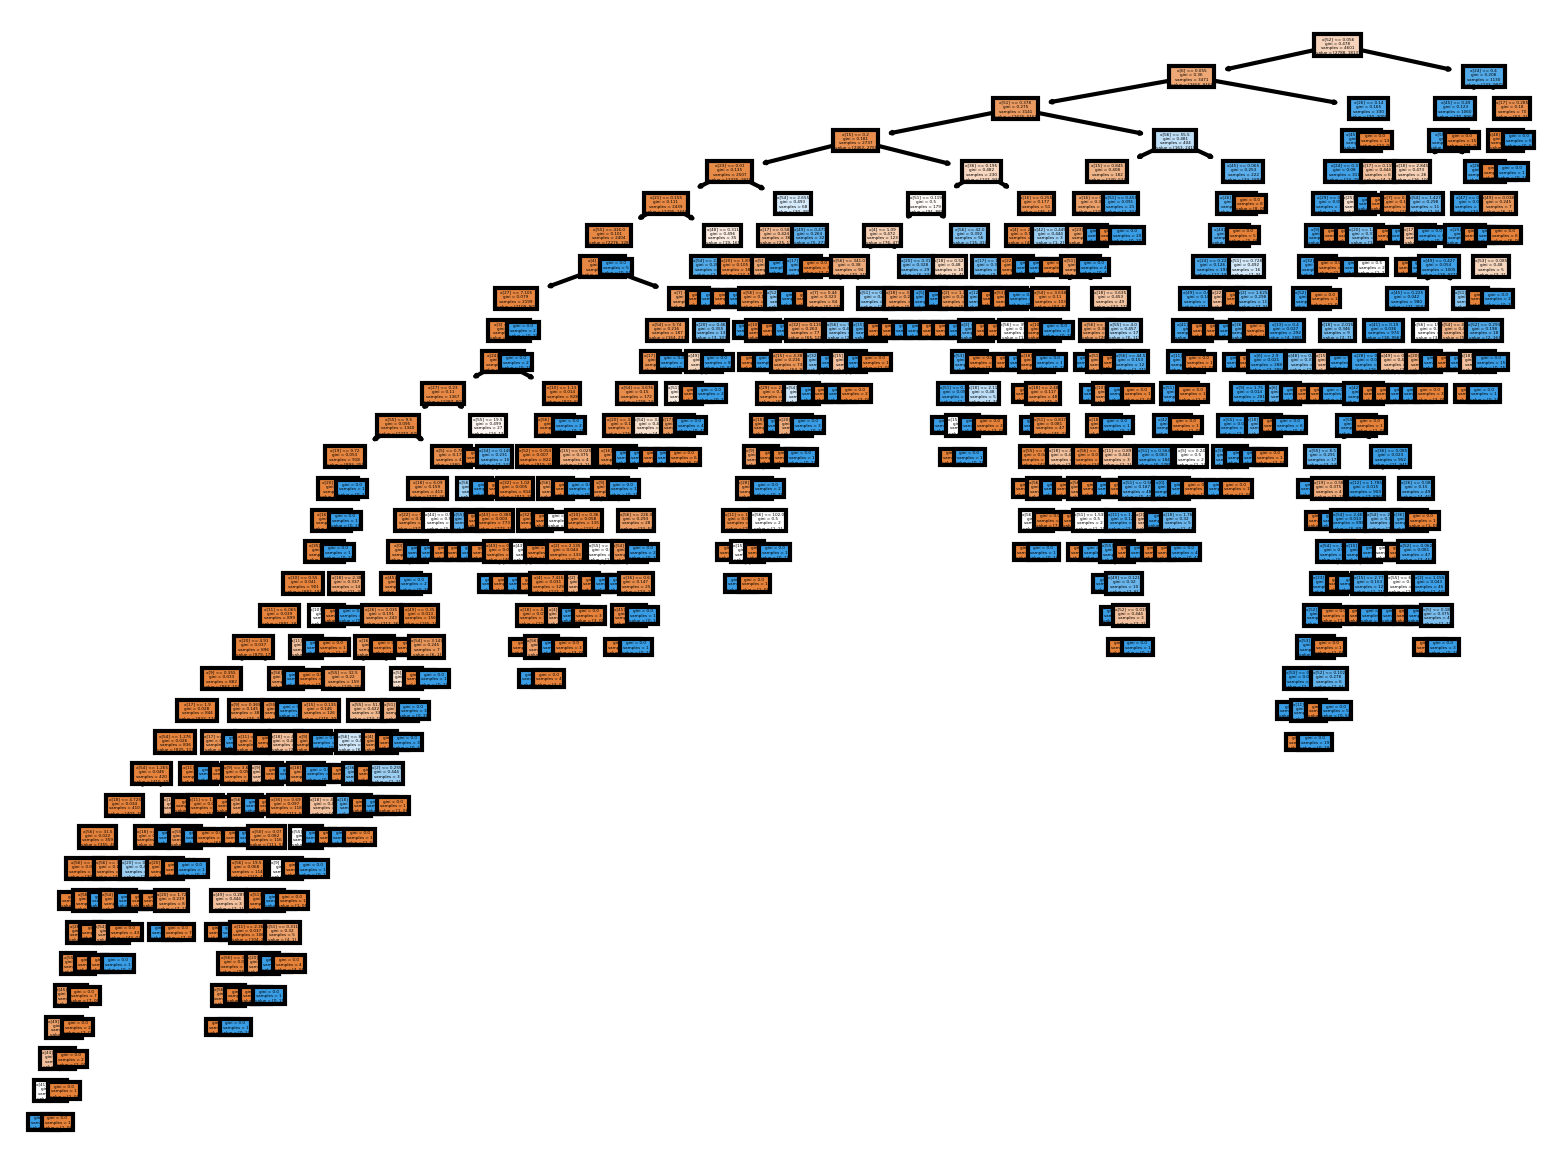

In [ ]:
# Fit the classifier
DTC.fit(X,y)
# Make a super cool tree plot
plt.figure(dpi=300)
plot_tree(DTC, filled=True)
plt.show()

# Ridge Classification

In [ ]:
# Call the classifier and then fit
# Predict the y values based on the X_test set
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)

In [ ]:
# Print the accuracy of the model
print("The Accuracy of the Ridge Classifier Model is {0:.1f} %".format(ridge_classifier.score(X_test, y_test)*100))

The Accuracy of the Ridge Classifier Model is 87.5 %


# Ridge Classification with Hyperparameter Tuning

In [ ]:
# Perform hyperparameter tuning on ridge classification by varying the alpha value from -5,2, with 5000 points
# Print both the best score and the corresponding alpha value
best_score = 0
best_alpha = None
for alpha in np.logspace(-5, 2, 5000):
    ridge_classifier = RidgeClassifier(alpha = alpha)
    ridge_classifier.fit(X_train, y_train)
    y_pred = ridge_classifier.predict(X_test)

    score = ridge_classifier.score(X_test, y_test)

    if score > best_score:
        best_score = score
        best_alpha = alpha

print('BEST ALPHA:', best_alpha)
print('BEST SCORE:', best_score)

BEST ALPHA: 21.138054485391557
BEST SCORE: 0.8773072747014115


# K-Nearest-Neighbors

In [ ]:
# Call the classifier
knn_class=KNN(n_neighbors=3)
# Fit the classifier
knn_class.fit(X_train, y_train)
# Predict using the classifier
knn_predict=knn_class.predict(X_test)
# Calculate the accuracy and print it out
correct_predictions=np.where(knn_predict == y_test, 1, 0).sum()
acc_scores=(100*correct_predictions)/(len(y_test))
print("The accuracy of KNN is {0:.1f} %".format(acc_scores))

The accuracy of KNN is 79.9 %


# K-Nearest-Neighbors with Variation in the # of Neighbors

In [ ]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21)) # Include 20
# Varying the number of neighbors
for n_neighbors in parameter_values:
    estimator = KNN(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring = 'accuracy')
    # Appending the scores to the lists
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

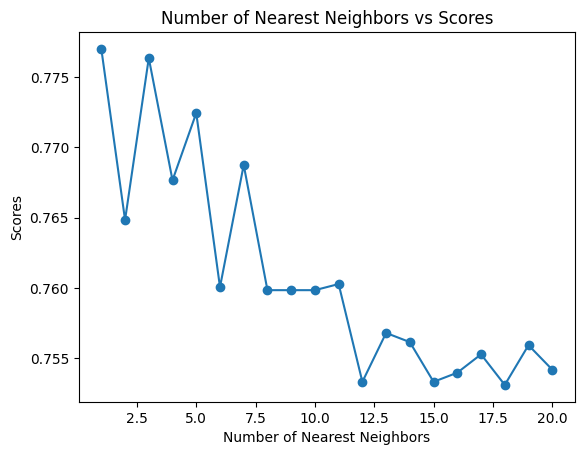

In [ ]:
# Plot the figure with the # of figures on the x-axis and the corresponding accuracy on the y-axis.
plt.figure()
plt.plot(parameter_values, avg_scores, '-o')
plt.ylabel('Scores')
plt.xlabel('Number of Nearest Neighbors')
plt.title("Number of Nearest Neighbors vs Scores")
plt.show()

# Add Cross-Validation to KNN

In [ ]:
# Transform X using the MinMaxScaler
X_transformed=MinMaxScaler().fit_transform(X)

In [ ]:
# Define the classifier
estimator=KNN()
# Perform KNN with cross validation as an added method to increase accuracy/data reproducibility
transformed_scores=cross_val_score(estimator, X_transformed, y, scoring='accuracy')
transformed_avg=np.mean((transformed_scores)*100)
print(("The Average Accuracy of K-Nearest Neighbors with MMS and Cross Validation is {0:.1f}").format(transformed_avg))

The Average Accuracy of K-Nearest Neighbors with MMS and Cross Validation is 86.5


# Add Min Max Scaling to DTC and RFC

In [ ]:
# DTC
scores_dtc_scaled=cross_val_score(DTC, X_transformed, y, scoring='accuracy')
print("Accuracy: {0:.5f} %".format(np.mean(scores_dtc_scaled)*100))

Accuracy: 88.21942 %


In [ ]:
# RFC
scores_rfc_scaled=cross_val_score(RFC, X_transformed, y, scoring='accuracy')
print("Accuracy: {0:.5f} %".format(np.mean(scores_rfc_scaled)*100))

Accuracy: 92.76205 %


# Neural Networks for Classification

In [ ]:
# Call the model
model=Sequential()

In [ ]:
# Create our multi-layered perceptron
model.add(Dense(5,input_dim=57, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=10,verbose=1)

Epoch 1/10
115/115 [==============================] - 1s 1ms/step - loss: 12.4613 - accuracy: 0.5552
Epoch 2/10
115/115 [==============================] - 0s 1ms/step - loss: 1.1826 - accuracy: 0.4329
Epoch 3/10
115/115 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6187
Epoch 4/10
115/115 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6755
Epoch 5/10
115/115 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6804
Epoch 6/10
115/115 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7043
Epoch 7/10
115/115 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7250
Epoch 8/10
115/115 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7576
Epoch 9/10
115/115 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7859
Epoch 10/10
115/115 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.815

# Not bad... but could be better. Lets try some hyperparameter tuning.

In [ ]:
# Empty list to be used when looping and comparing accuracy
acc_scores=[]

In [ ]:
# Repeat the process 10 times
for i in range(10):
  # Create a classifier
  mlp = MLPClassifier(max_iter=1000)

  # Hyperparameter grid to be searched over
  param_dist = {
      'hidden_layer_sizes': [(3,2), (3,3,3), (5,5,5), (2,2,2,2)],
      'activation': ['tanh','relu','logistic'],
  }

  # Create RandomizedSearchCV object
  random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=100, cv=5)

  # Fit the RandomizedSearchCV to the training data
  random_search.fit(X_train, y_train)

  # Record the model with the best accuracy
  best_mlp = random_search.best_estimator_

  # Predict the labels for the test set
  y_pred = best_mlp.predict(X_test)

  # Calculate the accuracy and then print it out
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Append the accuracy scores to our list
  acc_scores.append(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.9424538545059717


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.9305103148751357


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.9402823018458197


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.9250814332247557


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.9261672095548317


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.9413680781758957


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.9348534201954397


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.9305103148751357


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.9359391965255157


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.6036916395222585


In [ ]:
# Print the highest accuracy
print(acc_scores)
print("The highest accuracy was {0:.3f}".format(max(acc_scores)))

[0.9424538545059717, 0.9305103148751357, 0.9402823018458197, 0.9250814332247557, 0.9261672095548317, 0.9413680781758957, 0.9348534201954397, 0.9305103148751357]
The highest accuracy was 0.942


In [ ]:
# Print the best MLP model
print(best_mlp)

MLPClassifier(activation='logistic', hidden_layer_sizes=(3, 2), max_iter=1000)


# Make a Box-and-Whisker Plot of the Neural Network Hyperparameter Tuning Accuracies

In [ ]:
# Can't let one outlier ruin our perfectly good graph
acc_scores=acc_scores[0:8]

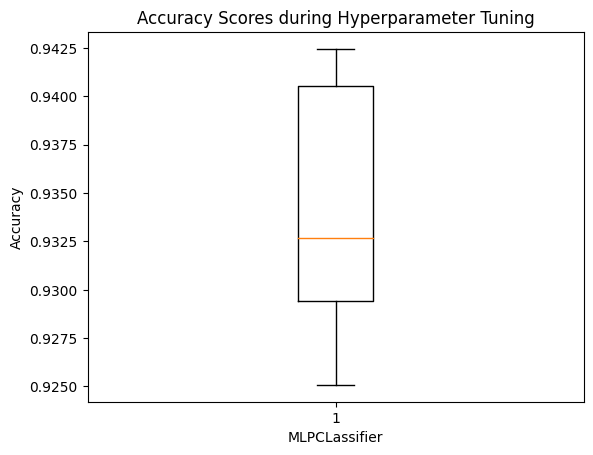

In [ ]:
# Make a super sick graph
plt.figure()
plt.title("Accuracy Scores during Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.xlabel("MLPCLassifier")
plt.boxplot(acc_scores)
plt.show()